In [ ]:
# Import libraries
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler  # Add this for scaling
from sklearn.metrics import accuracy_score, classification_report

# Load data
data = load_breast_cancer()
X = data.data
y = data.target

# Add scaling to fix the convergence warning
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create model with increased max_iter
model = LogisticRegression(max_iter=1000)  # Increased from default 100
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print(f"Model Accuracy: {accuracy:.2f}")

# Function to predict new cases
def predict_cancer(features):
    # Scale the features first!
    features_scaled = scaler.transform([features])
    result = model.predict(features_scaled)
    probability = model.predict_proba(features_scaled)
    return {
        'prediction': "Malignant" if result[0] == 1 else "Benign",
        'confidence': f"{max(probability[0]) * 100:.2f}%"
    }

# Test it
test_case = X_test[0]
result = predict_cancer(scaler.inverse_transform([test_case])[0])
print(f"\nPrediction for test case: {result['prediction']}")
print(f"Confidence: {result['confidence']}")

# Show detailed report
print("\nDetailed Classification Report:")
print(classification_report(y_test, predictions,
                          target_names=['Benign', 'Malignant']))

Model Accuracy: 0.97

Prediction for test case: Malignant
Confidence: 88.53%

Detailed Classification Report:
              precision    recall  f1-score   support

      Benign       0.98      0.95      0.96        43
   Malignant       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114




Model Performance:
R² Score: 0.403
Mean Squared Error: 0.390


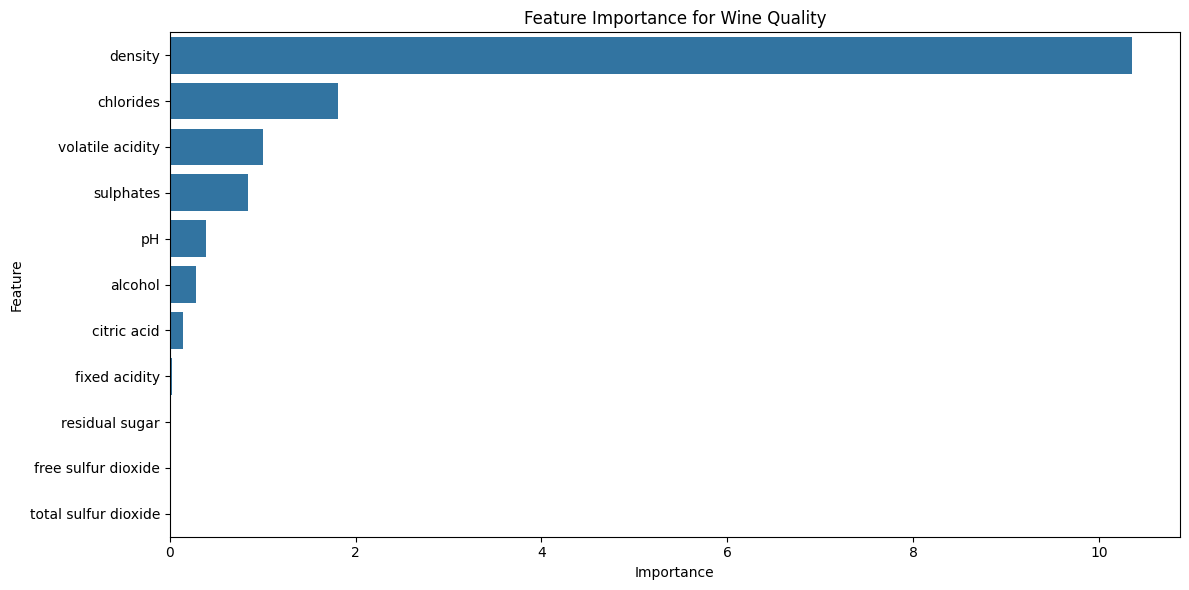

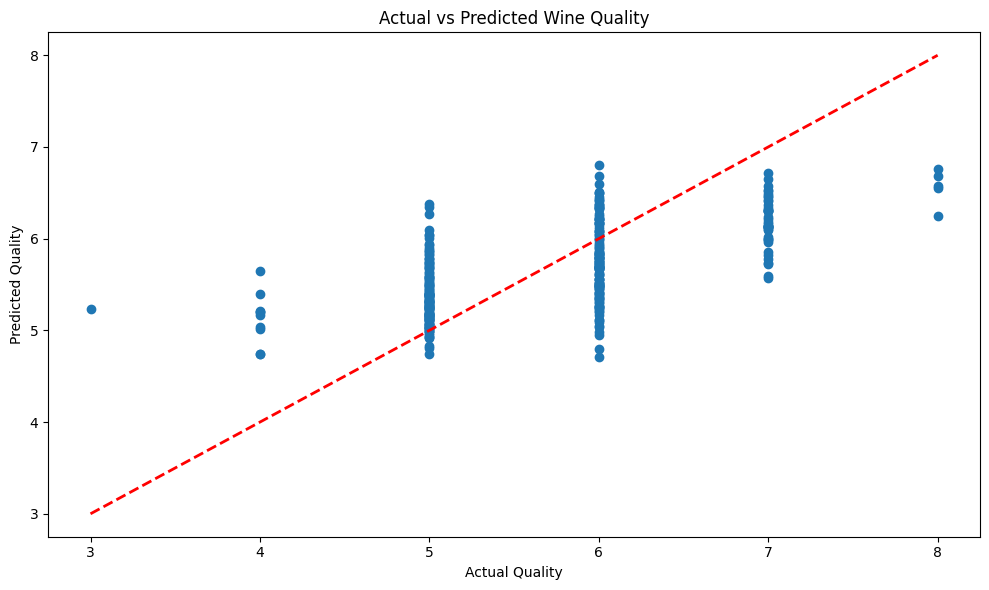

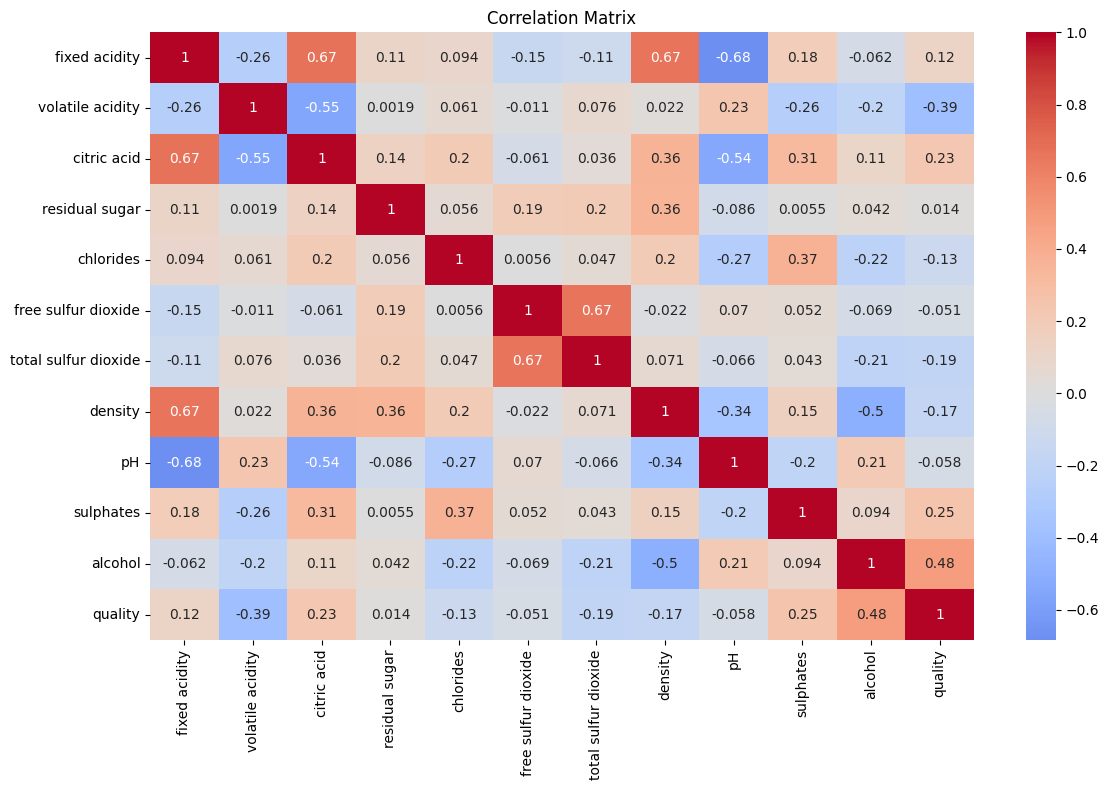


Example Prediction:
Predicted Quality: 5.35
Actual Quality: 6

Feature Coefficients:
fixed acidity: 0.0231
volatile acidity: -1.0013
citric acid: -0.1408
residual sugar: 0.0066
chlorides: -1.8065
free sulfur dioxide: 0.0056
total sulfur dioxide: -0.0036
density: -10.3516
pH: -0.3937
sulphates: 0.8412
alcohol: 0.2819


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
# Since the data is comma-separated, we can read it directly
df = pd.read_csv('winequality-red.csv')

# Separate features (X) and target (y)
X = df.drop('quality', axis=1)
y = df['quality']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Print model performance
print("\nModel Performance:")
print(f"R² Score: {r2_score(y_test, predictions):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, predictions):.3f}")

# Create feature importance DataFrame
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': abs(model.coef_)
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for Wine Quality')
plt.tight_layout()
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Wine Quality')
plt.tight_layout()
plt.show()

# Create correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Function to predict wine quality
def predict_wine_quality(features):
    """
    Predict wine quality based on input features
    features should be a list of values in the same order as the training features
    """
    prediction = model.predict([features])
    return prediction[0]

# Example prediction
print("\nExample Prediction:")
example_wine = X_test.iloc[0].values
print(f"Predicted Quality: {predict_wine_quality(example_wine):.2f}")
print(f"Actual Quality: {y_test.iloc[0]}")

# Print feature coefficients
print("\nFeature Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

<ipython-input-11-7554015f4cfb>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
<ipython-input-11-7554015f4cfb>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

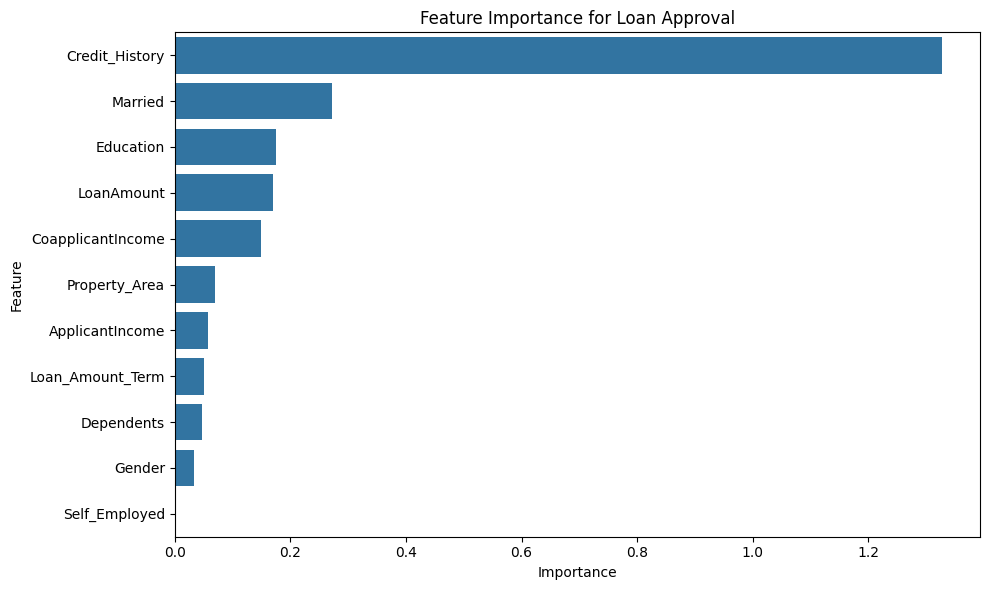

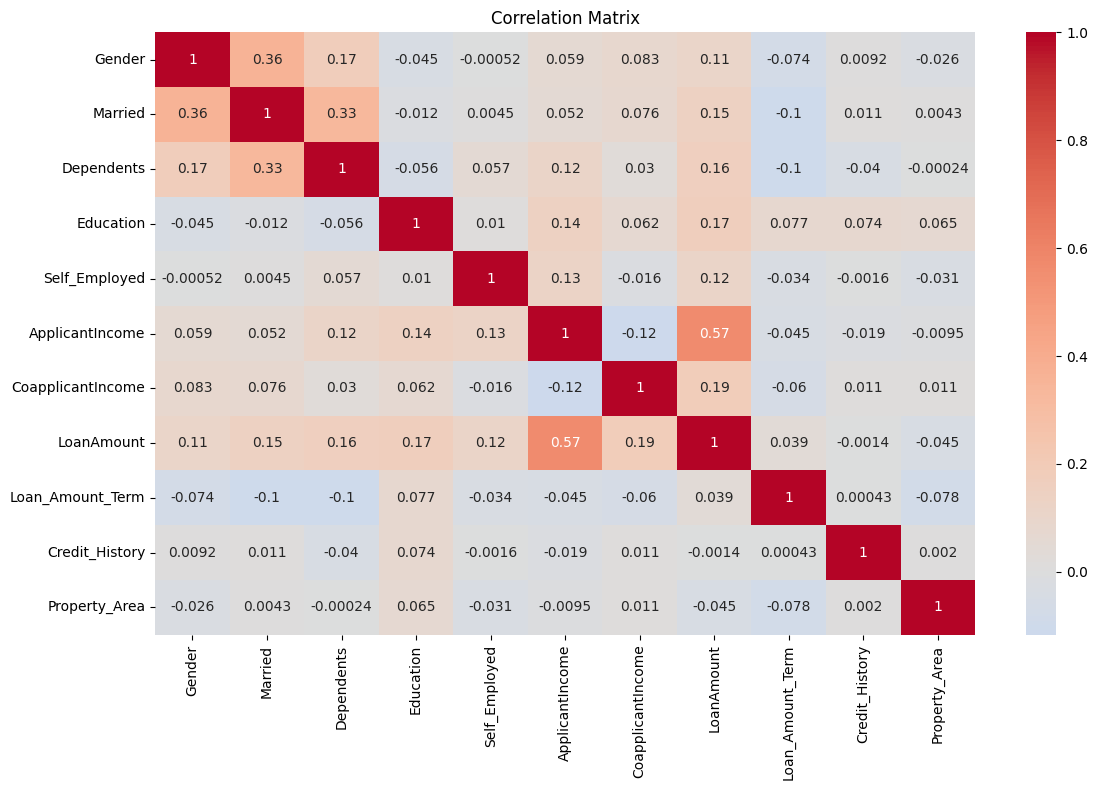


Model Coefficients:
Gender: -0.0324
Married: 0.2715
Dependents: 0.0472
Education: 0.1744
Self_Employed: -0.0028
ApplicantIncome: 0.0573
CoapplicantIncome: -0.1498
LoanAmount: -0.1703
Loan_Amount_Term: -0.0506
Credit_History: 1.3270
Property_Area: 0.0692

Example Prediction:
{'Approval Probability': '86.17%', 'Prediction': 'Approved'}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
train_df = pd.read_csv('loan_sanction_train.csv')
test_df = pd.read_csv('loan_sanction_test.csv')

# Data preprocessing
def preprocess_data(df):
    # Fill missing values
    df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
    df['Married'].fillna(df['Married'].mode()[0], inplace=True)
    df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
    df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
    df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
    df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)
    df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

    # Convert categorical to numerical
    df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
    df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
    df['Dependents'] = df['Dependents'].replace('3+', 3)
    df['Dependents'] = pd.to_numeric(df['Dependents'])
    df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
    df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})
    df['Property_Area'] = df['Property_Area'].map({'Urban': 2, 'Semiurban': 1, 'Rural': 0})

    return df

# Preprocess both datasets
train_df = preprocess_data(train_df)
test_df = preprocess_data(test_df)

# Prepare features
features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
           'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
           'Loan_Amount_Term', 'Credit_History', 'Property_Area']

X_train = train_df[features]
y_train = train_df['Loan_Status'].map({'Y': 1, 'N': 0})

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(test_df[features])

# Train model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Feature importance visualization
importance = pd.DataFrame({
    'Feature': features,
    'Importance': abs(model.coef_[0])
})
importance = importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance, x='Importance', y='Feature')
plt.title('Feature Importance for Loan Approval')
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(train_df[features].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Make predictions on test set
predictions = model.predict(X_test_scaled)
prediction_proba = model.predict_proba(X_test_scaled)

# Function to predict loan approval
def predict_loan(features_input):
    """
    Predict loan approval probability
    features_input should be a list of values in the same order as features
    """
    features_scaled = scaler.transform([features_input])
    prob = model.predict_proba(features_scaled)[0]
    return {
        'Approval Probability': f"{prob[1]:.2%}",
        'Prediction': 'Approved' if prob[1] > 0.5 else 'Not Approved'
    }

# Print model coefficients
print("\nModel Coefficients:")
for feature, coef in zip(features, model.coef_[0]):
    print(f"{feature}: {coef:.4f}")

# Example prediction
print("\nExample Prediction:")
example = X_test_scaled[0]
result = predict_loan(test_df[features].iloc[0])
print(result)

# Add predictions to test dataset
test_df['Predicted_Loan_Status'] = predictions
test_df['Approval_Probability'] = prediction_proba[:, 1]

# Save predictions
test_df[['Loan_ID', 'Predicted_Loan_Status', 'Approval_Probability']].to_csv('loan_predictions.csv', index=False)